# Imports

In [293]:
# import required libraries

# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# path
from pathlib import Path

# supress non-critical warnings
import warnings
warnings.filterwarnings('ignore')

# to calculate chi-quare statistic
from scipy import stats

In [294]:
# construct project root path
# update this with your own project root path, to run the notebook seamlessly!
project_root = Path("/Users/saibharathbesta/projects/data_analytics_assignment_1/")

# Read the data

In [295]:
# load the data 

# construct the path of the file
file_path = project_root / "data/M25_DA_A1_Dataset1.csv"

# read the csv file from file_path using pandas
df = pd.read_csv(file_path)

In [296]:
# let's have a look at the first five rows of the data
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [297]:
# let's take a look at the size of the dataset
df.shape

(48843, 15)

In [298]:
# let's take a look at the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48843 non-null  object 
 1   Workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Martial_Status  48842 non-null  object 
 6   Occupation      46033 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_week  48842 non-null  float64
 13  Country         47985 non-null  object 
 14  Target          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [299]:
# explore the column Age

# before we move forward let's convert the datatype of column Age to int
# from before, we already know that the column Age doesn't have any null values

# during the exploration we found that the column 'Age' seems to have invalid entries for eg: "|1x3 Cross validator"
# to ignore such entries using option errrs='coerce' in pd.to_numeric method (this will replace errors with NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# check the number of rows where the Age is Nan
nan_count = df['Age'].isna().sum()
print(f"Number of rows where the Age is Nan: {nan_count}")

Number of rows where the Age is Nan: 1


In [300]:
# since it's only one row, let's drop this row!! Also, age cannot to 0, so there is no point in replacing it with 0
df = df.dropna(subset=['Age'])

# convert the remaining values to int
df['Age'] = df['Age'].astype(int)

In [301]:
# let's generate descriptive stats for the data
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [302]:
# let's check the null values in the dataset
df.isnull().sum()

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            857
Target               0
dtype: int64

**Observations**

Observations from the above operations are as follows:
- There are significant null values in columns "Workclass", "Occupation" and "Country".
- We have a total of 5 continuous variables and remaining are categorical variables.
- By looking at the descrptive stats, we can figure out that columns "Capital_Loss" and "Capital_Gain" are skewed. (will be validated later)

# Pre-processing

In [303]:
# get the list of all categorical columns in the dataframe
categorical_cols = [col_name for col_name, data_type in df.dtypes.items() if data_type == 'object']

# get the list if all numeric columns in the dataframe
numeric_cols = [col_name for col_name, data_type in df.dtypes.items() if data_type in ['int64', 'float64']]

In [304]:
# remove all the leading and trailing spaces for all the categorical columns in the dataframe
# this is important and will help us when merging two dataframes/adding new categories/groups!!

for col in categorical_cols:
    df[col] = df[col].str.strip()

## Function to create a labeled barplot

In [305]:
def labeled_barplot(df: pd.DataFrame, feature: str, perc: bool=False, n: int=None):
    """
    this function creates a labeled barplot for a given feature in a dataset.


    Args:
        df (pd.DataFrame): pandas dataframe.
        feature (str): column for which you'd like to create a labeled barplot.
        perc (bool, optional): change this to True if you want percentage label. Defaults to False.
        n (int, optional): displays top n category levels. Defaults to None, i.e., display all categories.
    """

    # set the figure size based on number of categories
    fig_width = (n or df[feature].nunique()) + 1
    plt.figure(figsize=(fig_width, 5))
    
    # create countplot with sorted order
    order = df[feature].value_counts().index[:n]
    ax = sns.countplot(data=df, x=feature, palette="Paired", order=order)
    
    # add labels on bars
    total = len(df) if perc else 1
    for bar in ax.patches:
        height = bar.get_height()
        label = f"{100 * height / len(df):.1f}%" if perc else int(height)
        
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, 
                label, ha='center', va='bottom', fontsize=12)
    
    plt.xticks(rotation=90, fontsize=15)
    plt.tight_layout()
    plt.show()

In [306]:
def histogram_boxplot(df: pd.DataFrame, feature: str, figsize: tuple[int,int]=(12, 7), kde: bool=False, bins: int=None):
    """_summary_

    Args:
        df (pd.DataFrame): pandas dataframe
        feature (str): column for which you'd like to create a histogram + barplot
        figsize (tuple[int,int], optional): size of the figure. Defaults to (12, 7).
        kde (bool, optional): change this to True if you would like a density curve. Defaults to False.
        bins (int, optional): number of bins for histogram. Defaults to None.
    """
    # create subplots with boxplot on top, histogram below
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=figsize, 
                                          gridspec_kw={"height_ratios": (0.25, 0.75)},
                                          sharex=True)
    
    # boxplot with mean indication
    sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, color="violet")
    
    # histogram with optional KDE (kernel density estimate)
    if bins is not None:
        sns.histplot(data=df, x=feature, kde=kde, bins=bins, ax=ax_hist)
    else:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist)
    
    # add mean and median lines to histogram
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    ax_hist.axvline(mean_val, color="green", linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax_hist.axvline(median_val, color="black", linestyle="-", label=f"Median: {median_val:.2f}")
    
    # add legend and formatting
    ax_hist.legend()
    plt.tight_layout()
    plt.show()


# Question 1

## Education distribution & grouping [5 Marks]

In [307]:
# find unique values in the column "Education"
unique_education_list = df['Education'].unique().tolist()

# unique values in the column 'Education'
unique_education_list

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

**Approach**

Based on the above visualisation, I would like to map the data into 5 categories as below,

- elementary: Preschool through 8th grade
- high_school_incomplete: 9th-12th grade (without graduation)
- high_school_complete: HS-grad (majority!!)
- post_secondary: Some college + associate degrees
- bachelors: Bachelors degree
- advanced_degree: Masters, Doctorate, Prof-school (professional school (eg, medical, law etc.,))

In [308]:
# create a mapping json to group data into broader and more meaningful categories
education_mapping = {
    "elementary": ["Preschool", "1st-4th", "5th-6th", "7th-8th"],
    "high_school_incomplete": ["9th", "10th", "11th", "12th"],
    "high_school_complete": ["HS-grad"],
    "post_secondary": ["Some-college", "Assoc-acdm", "Assoc-voc"],
    "bachelors": ["Bachelors"],
    "advanced_degree": ["Masters", "Doctorate", "Prof-school"]
    }

In [309]:
# create a new dataframe with the mapping defined above
rows = []
for category, education_levels in education_mapping.items():
    for level in education_levels:
        rows.append({"Education_Category": category, "Education": level})

df_mapping = pd.DataFrame(rows)

In [310]:
# add the new column education category to the main dataframe
df = df.merge(df_mapping, how='left', on=['Education'])

In [311]:
# let's take a look at the dataset after adding new group!
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target,Education_Category
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,bachelors
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,bachelors
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,high_school_complete
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,high_school_incomplete
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,bachelors


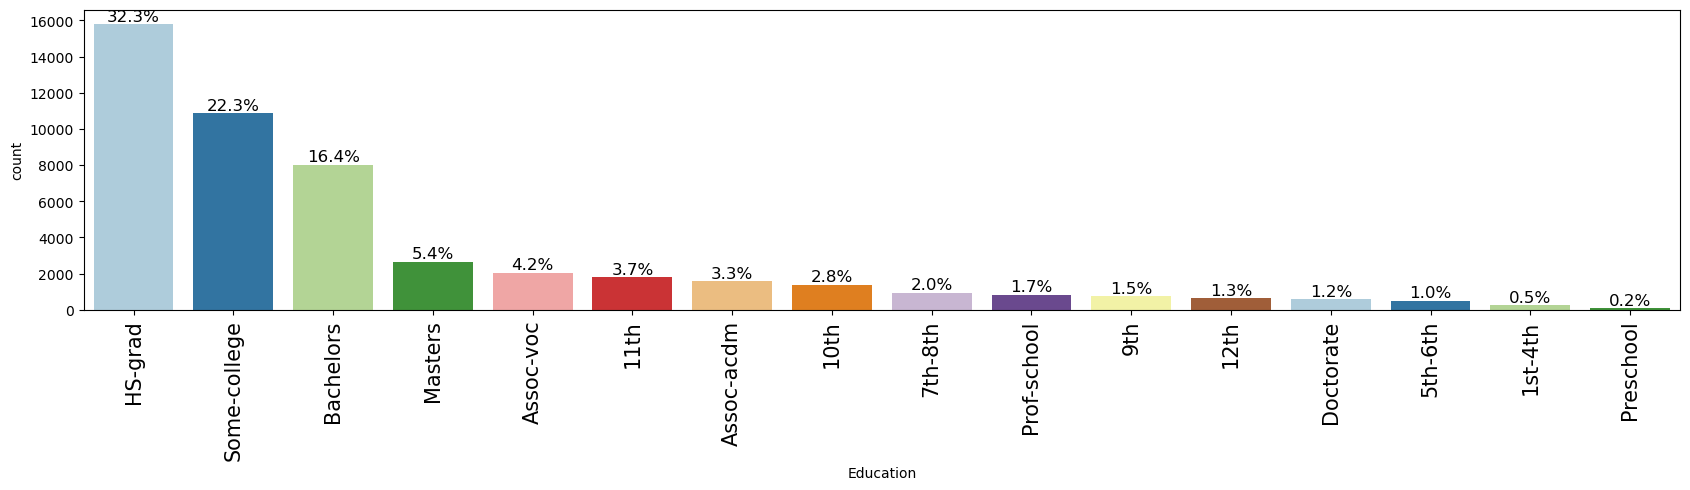

In [312]:
# let's visualise the education data
# before grouping!!
labeled_barplot(df=df, feature='Education', perc=True)

**Observations**

- There are a total of 16 unique values in the column 'Education'.
- Majority of the individual datapoints suggest that majority of the individuals are HS-grad (high school graduates).

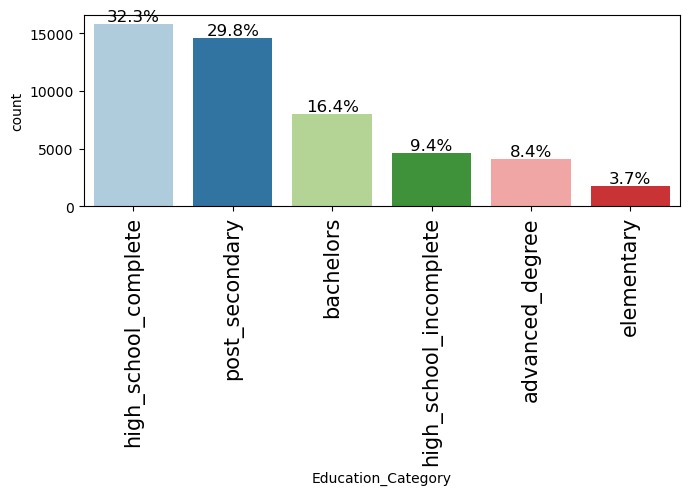

In [313]:
# let's visualise the education data
# after grouping!!
labeled_barplot(df=df, feature='Education_Category', perc=True)

In [314]:
df['Education'].value_counts()

Education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [315]:
df['Education_Category'].value_counts()

Education_Category
high_school_complete      15784
post_secondary            14540
bachelors                  8025
high_school_incomplete     4614
advanced_degree            4085
elementary                 1794
Name: count, dtype: int64

**Observations**

- 16 categories create noise and it takes much more time to understand than having 5 categories.
- By creating 5 categories we have also reduced the small sample issue.

# Age-Work Instensity Relationship and Grouping [10 Marks]

### Before grouping!

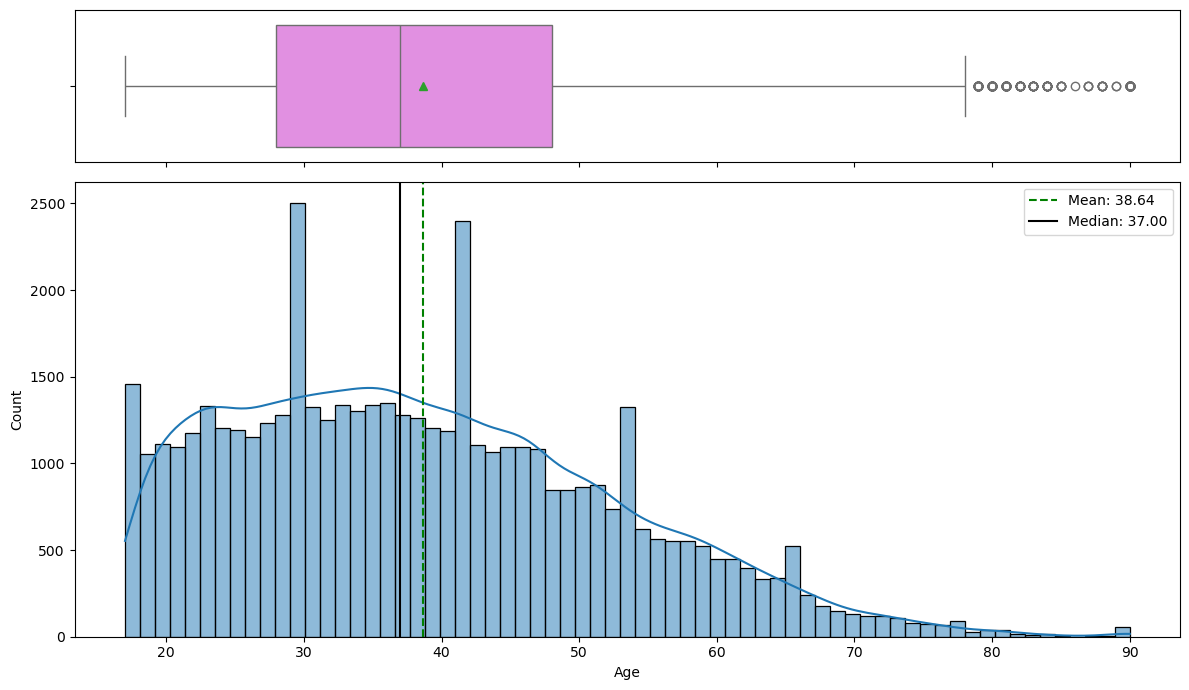

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [316]:
# let's take a look at the distribution of the column 'Age'
histogram_boxplot(df=df, feature='Age', kde=True)

# get the descriptive stats of the column Age
df['Age'].describe()

**Observations [Before Grouping]**
- Age is slightly skewed to the right.
- minimum age is 17 whereas max age is 90.
- there are few outliers as well. I feel that it is strange that someone is working even after the age of 70!! (needs investigation!)

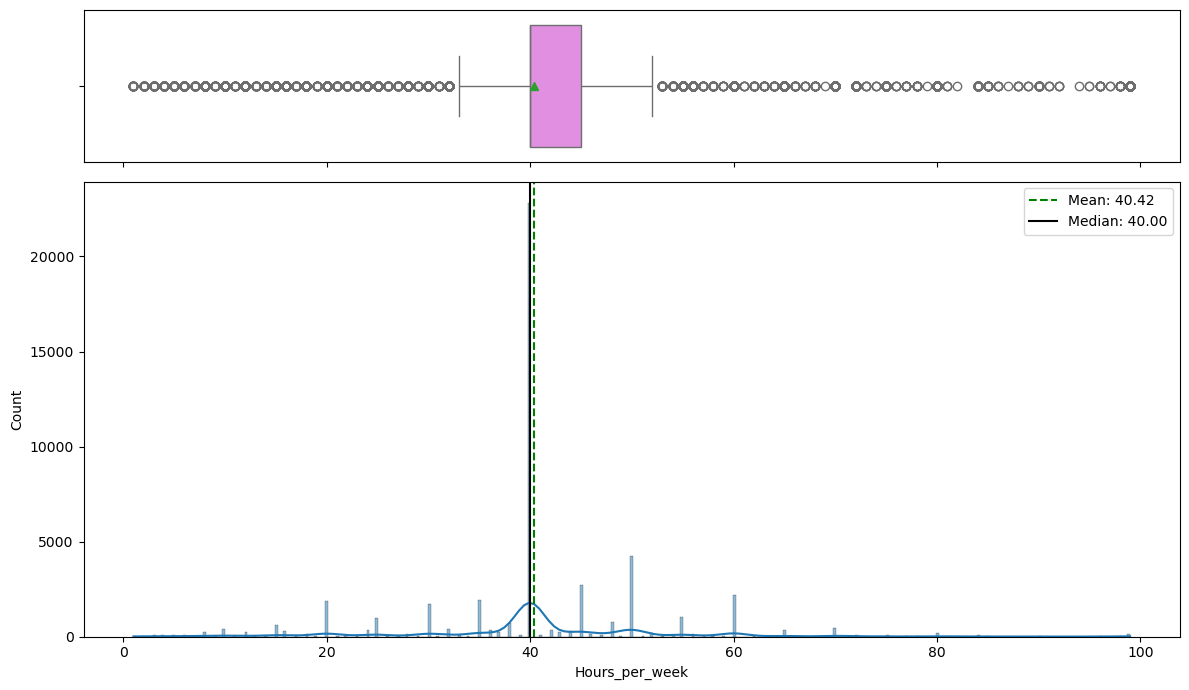

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

In [317]:
# let's take a look at the distribution of the column 'Hours_per_week'
histogram_boxplot(df=df, feature='Hours_per_week', kde=True)

# get the descriptive stats of the column 'Hours_per_week'
df['Hours_per_week'].describe()

**Observations [Before Grouping]**

- Data is distributed uniformly with a lot of outliers on both ends!!
- Majority of the people work between 30-50 hours a week with few working as little as 1 hour and few working as much as 99 hours!!

**Approach**

- full-time: if the hours per week is between 35 and 40 (inclusive).
- part-time: less than 35 hours per week.
- overtime: more than 40 hours a week.

**Reasoning**

- 35 hours is the legal definition of full time in many jurisdictions (according to google!!).
- 40 hours is the traditional definition of work week.
- Anything more than 40 is overtime and anything less than 35 hours is part-time!

In [318]:
# let's categorise the data into part-time, full-time and overtime based on the columns "Hours_per_week"

def categorize_work_intensity(hours: float) -> str:
    """
    this function which returns the values "part-time", "full-time" or "overtime" based in input hours.

    Args:
        hours (float): hours worked per week

    Returns:
        str: over-time/part-time/full-time based on the input value!!
    """
    if hours > 80:
        return "close-to-burnout"
    elif hours > 60:
        return "excess"
    elif hours > 40:
        return "over-time"
    elif hours > 35 :
        return "full-time"
    else:
        return "part-time"
    

# add a new column "Work_Intensity" based on the above logic
df['Work_Intensity'] = df["Hours_per_week"].apply(categorize_work_intensity)

In [319]:
# let's categorise the data into youth, young-adult, adult, middle-aged and senior based on the columns "Age_Category"

def categorize_age(age: float) -> str:
    """
    this function which returns the values "youth", "young-adult", "adult", "middle-aged" or "senior" based in input age.

    Args:
        age (float): age of the person

    Raises:
        TypeError: when no condition is satisfied!!

    Returns:
        str: youth/young-adult/adult/middle-aged/senior based on the input value!!
    """
    if age > 65:
        return "senior"
    elif age > 45:
        return "middle-aged"
    elif age > 35:
        return "adult"
    elif age > 25:
        return "young-adult"
    else:
        return "youth"

# add a new column "Age_Category" based on the above logic
df['Age_Category'] = df["Age"].apply(categorize_age)

In [320]:
df["Age_Category"].unique()

array(['adult', 'middle-aged', 'young-adult', 'youth', 'senior'],
      dtype=object)

## After grouping!

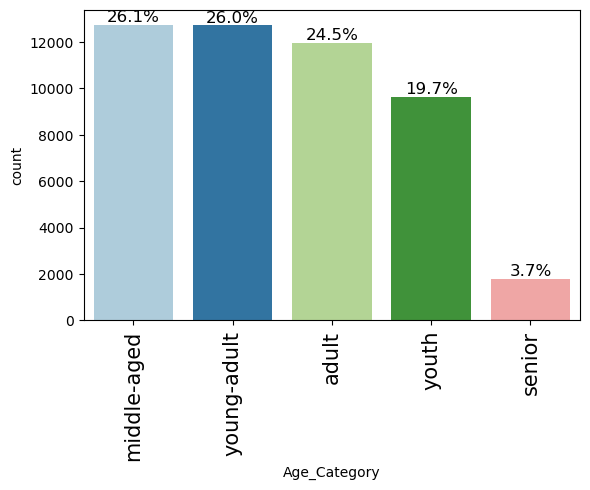

Age_Category
middle-aged    12741
young-adult    12719
adult          11952
youth           9627
senior          1803
Name: count, dtype: int64

In [321]:
# # let's visualise the age_category data
labeled_barplot(df=df, feature='Age_Category', perc=True)

# get value counts!
df["Age_Category"].value_counts()

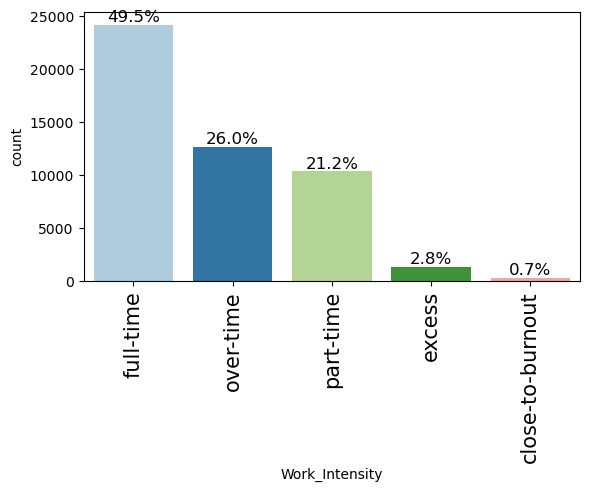

Work_Intensity
full-time           24158
over-time           12676
part-time           10332
excess               1358
close-to-burnout      318
Name: count, dtype: int64

In [322]:
# # let's visualise the Work_Intensity data
labeled_barplot(df=df, feature='Work_Intensity', perc=True)

# get value counts!
df["Work_Intensity"].value_counts()

**Observations [After Grouping]**

- The data seems much more readable.
- Majority of the poeple in the dataset are below 65 years of age!
- Majority of the people in the above dataset work full time i.e., work between 35-40 hours a week. Followed by overtimers!!

In [323]:
cols =["Work_Intensity", "Age_Category"]

<Axes: xlabel='Work_Intensity'>

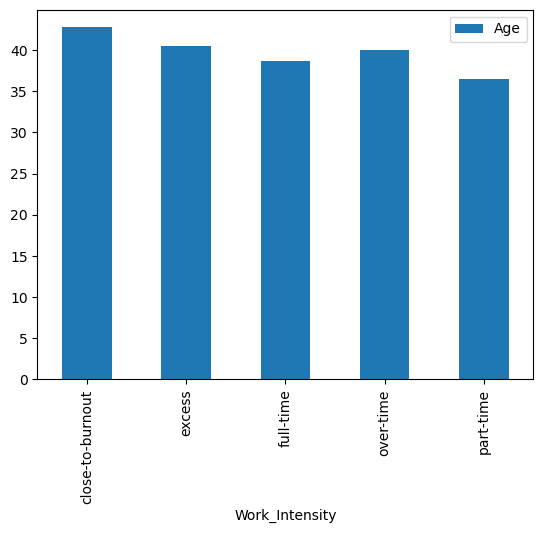

In [324]:
# plot the average age per work_intensity category!!
df.groupby(by='Work_Intensity')["Age"].mean().reset_index().plot(x='Work_Intensity', y='Age', kind='bar')

<Axes: xlabel='Age_Category'>

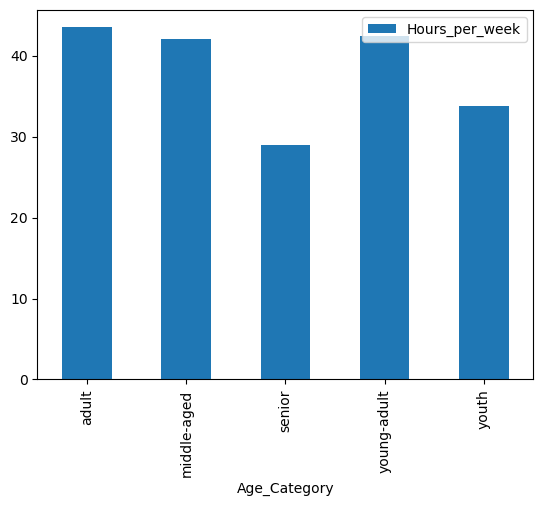

In [325]:
# plot average hours per week per age category!
df.groupby(by='Age_Category')["Hours_per_week"].mean().reset_index().plot(x='Age_Category', y='Hours_per_week', kind='bar')

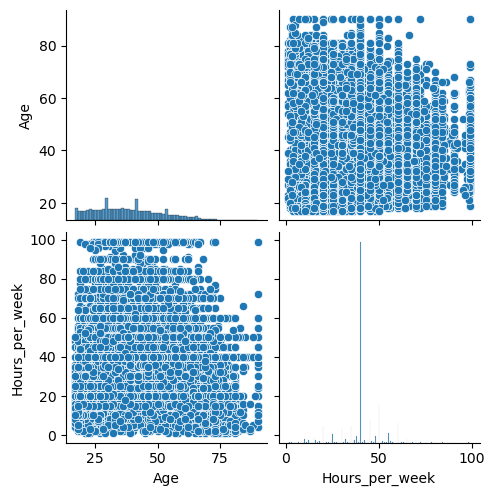

In [326]:
sns.pairplot(data=df[['Age', 'Hours_per_week']])

**Oservations [pairplot]**

- We can observe that few some people aged >90 are working close to 100 hours a week. Seems like a data issue!!

In [327]:
# create a dataframe (cross tablulation) to show the relation between two categorical varianles!
df_crosstab = pd.crosstab(df['Age_Category'], df['Work_Intensity'])

# print the 
print(df_crosstab)

Work_Intensity  close-to-burnout  excess  full-time  over-time  part-time
Age_Category                                                             
adult                        106     410       6091       3994       1351
middle-aged                  103     401       6639       3691       1907
senior                        13      31        474        193       1092
young-adult                   78     419       6888       3668       1666
youth                         18      97       4066       1130       4316


In [328]:
# calculate the chi-square statistic and other related values
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print the chi-square statistic
print(f"Chi-square statistic: {chi2}")

# print p-value
print(f"P-value: {p_value}")

Chi-square statistic: 3118.72094728631
P-value: 0.0


**Observations**

- high chi-square statistic shows a strong relationship between "Age_Category" and "Work_Intensity".
- 0.0 p-value confirms that the association is not due to a random chance.
- without grouping this would have been very diffcult to figure out!


**Conclusion**

- Age_Category has a strong, statistically significant relationship with their Work_Intensity.



# Capital Gains/Losses and Group Performance [10 Marks]

# overall capital gain/loss distribution

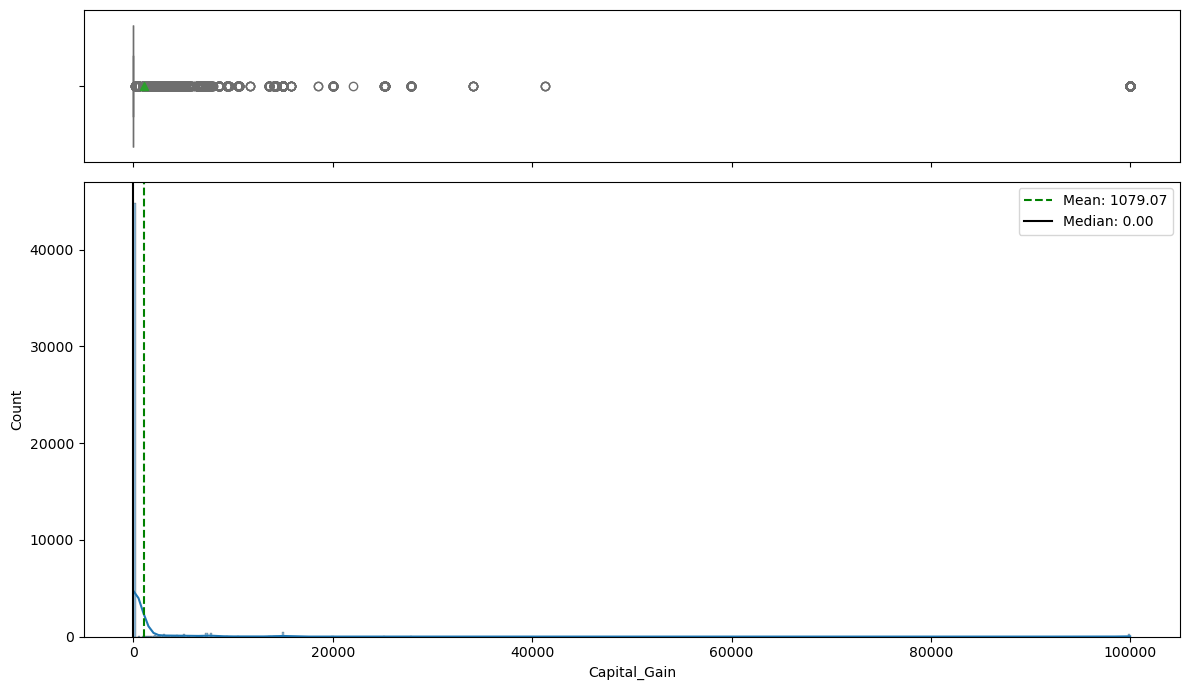

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

**************************************************

Only 8.26% of the values are non-zero in the column Capital_Gain


In [329]:
# let's take a look at the distribution of the column 'Capital_Gain'
histogram_boxplot(df=df, feature='Capital_Gain', kde=True)

# get the descriptive stats of the column Age
print(f'{df['Capital_Gain'].describe()}\n')

print(50*'*')

# calculate and print non-zero value percentage
non_zero_percent = round((df['Capital_Gain'].ne(0).sum()/df.shape[0]) * 100, 2)
# print non-zero percent
print(f'\nOnly {non_zero_percent}% of the values are non-zero in the column Capital_Gain')

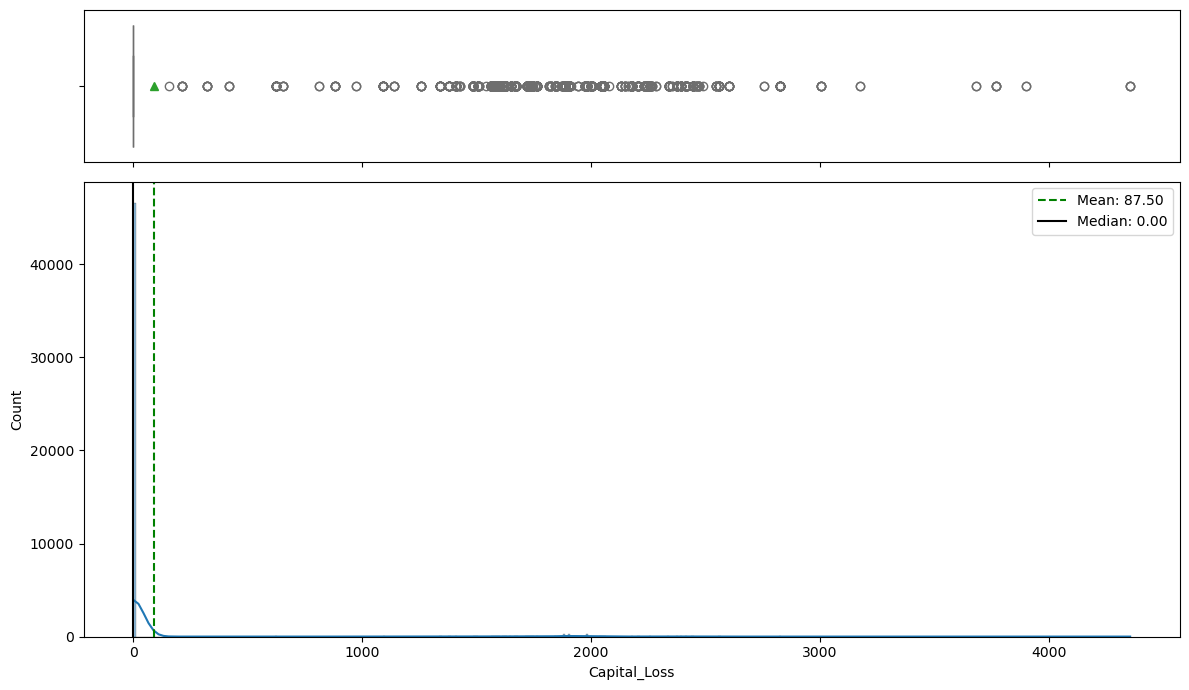

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_Loss, dtype: float64

**************************************************

Only 4.67% of the values are non-zero in the column Capital_Loss


In [330]:
# let's take a look at the distribution of the column 'Capital_Loss'
histogram_boxplot(df=df, feature='Capital_Loss', kde=True)

# get the descriptive stats of the column Age
print(f'{df['Capital_Loss'].describe()}\n')

print(50*'*')

# calculate and print non-zero value percentage
non_zero_percent = round((df['Capital_Loss'].ne(0).sum()/df.shape[0]) * 100, 2)
# print non-zero percent
print(f'\nOnly {non_zero_percent}% of the values are non-zero in the column Capital_Loss')

**Observations [Overall distribution]**

- Majority (more than 90%) of the people in the dataset don't have either capital gain/loss.
- Non-zero gain or loss is not available for everyone.

# non-zero capital gain/loss distribution

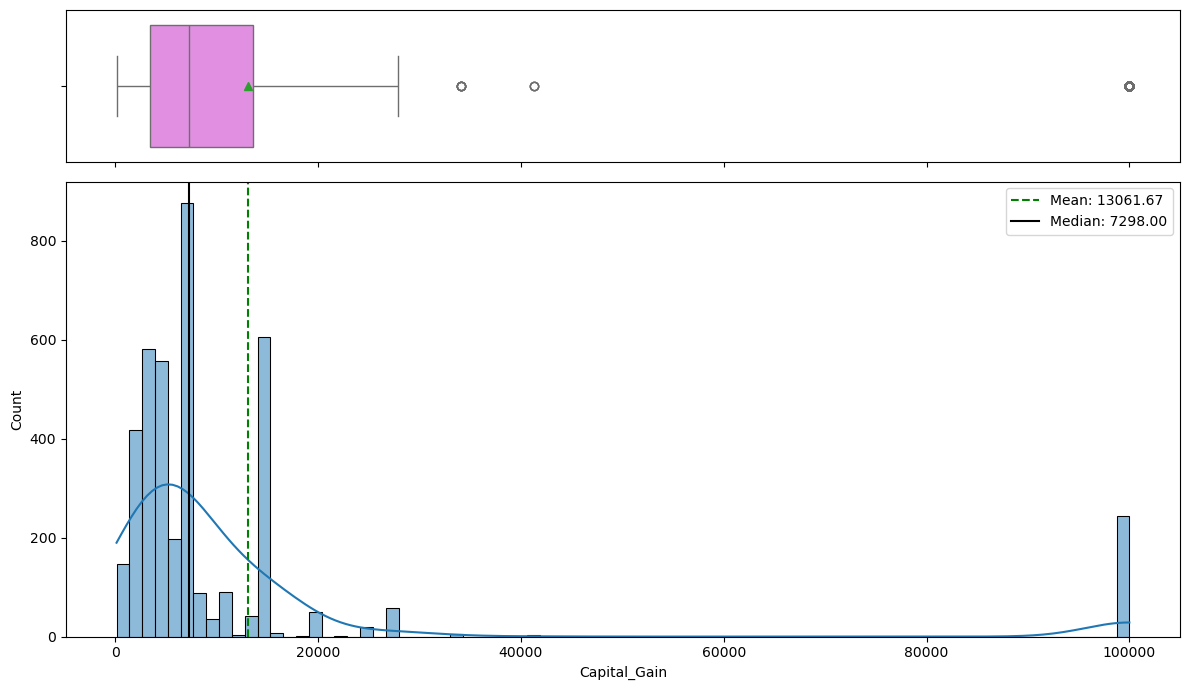

count     4035.000000
mean     13061.665675
std      22711.237412
min        114.000000
25%       3411.000000
50%       7298.000000
75%      13550.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

The collective capital gain reported is 52703821.0


In [331]:
# create a new dataframe to visualise non-zero capital gain
df_non_zero_capital_gain = df[df["Capital_Gain"] > 0]

# let's take a look at the distribution of the column 'Capital_Gain'
histogram_boxplot(df=df_non_zero_capital_gain, feature='Capital_Gain', kde=True)

# get the descriptive stats of the column Age
print(f'{df_non_zero_capital_gain['Capital_Gain'].describe()}\n')

# print the sum of capital gain reported
print(f"The collective capital gain reported is {df_non_zero_capital_gain['Capital_Gain'].sum()}")

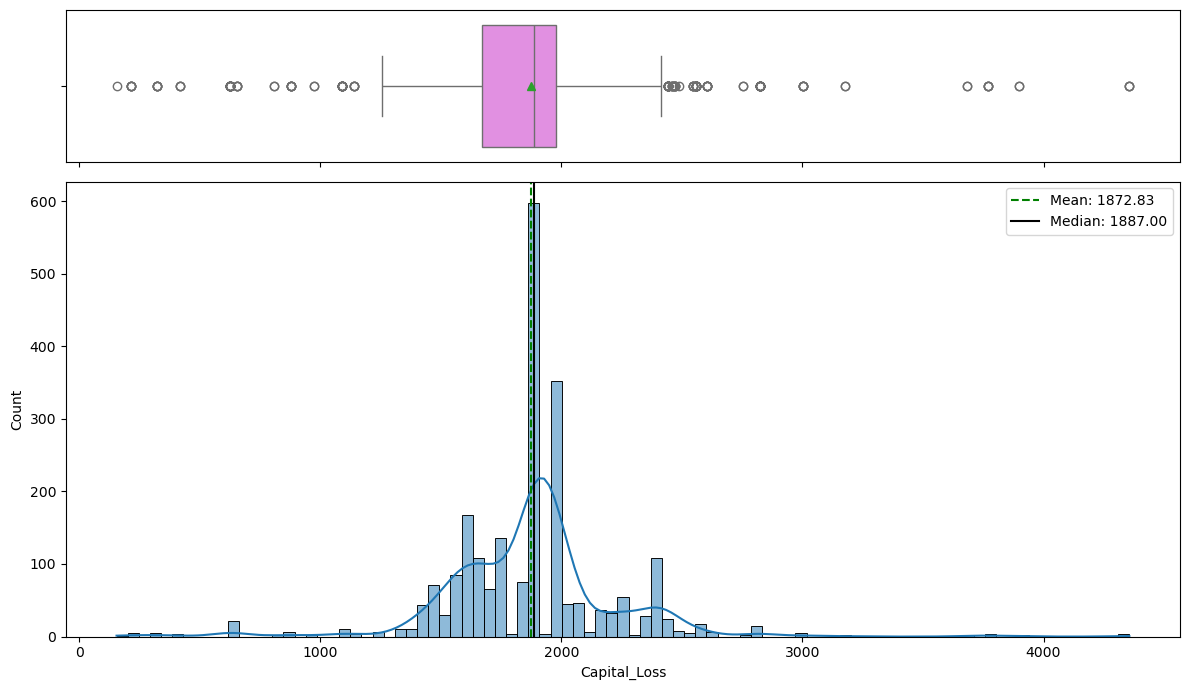

count    2282.000000
mean     1872.825592
std       364.048529
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: Capital_Loss, dtype: float64

The collective capital loss reported is 4273788.0


In [332]:
# create a new dataframe to visualise non-zero capital loss
df_non_zero_capital_loss = df[df["Capital_Loss"] > 0]

# let's take a look at the distribution of the column 'Capital_Loss'
histogram_boxplot(df=df_non_zero_capital_loss, feature='Capital_Loss', kde=True)

# get the descriptive stats of the column Age
print(f'{df_non_zero_capital_loss['Capital_Loss'].describe()}\n')

# print the sum of capital loss reported
print(f"The collective capital loss reported is {df_non_zero_capital_loss['Capital_Loss'].sum()}")

**Observations [non-zero]**

- non-zero values for capital gain are skewed to the right with couple of outliers towards right.
- non-zero values for capital loss are symmetrically distributed with outlier on either side.
- 8.26% of people have reported capital gain and only 4.67% reported captial loss. This suggests that more people are making money.
- Collective capital gained is 12.33 times more than the capital lost
    - When gaining, people are gaining more.
    - When losing, people are losing less.

In [333]:
# create a dataframe where there is at-least some capital activity
df_capital_activity = df[df[['Capital_Gain', 'Capital_Loss']].ne(0).any(axis=1)]

In [334]:
# proportion of individual with any capital activity
# proportion of all individual vs individual with either capital gain or loss

# calculate the proportion of individuals with some capital activity 
capital_activity_proportion = round((df_capital_activity.shape[0])/(df.shape[0]), 4)

print(f"The proportion of individuals with any capital activity is {capital_activity_proportion}")

The proportion of individuals with any capital activity is 0.1293


In [335]:
# create a new column "Net_Capital" i.e., "Capital_Gain" - "Capital_Loss"
df_capital_activity["Net_Capital"] = df_capital_activity["Capital_Gain"] - df_capital_activity["Capital_Loss"]

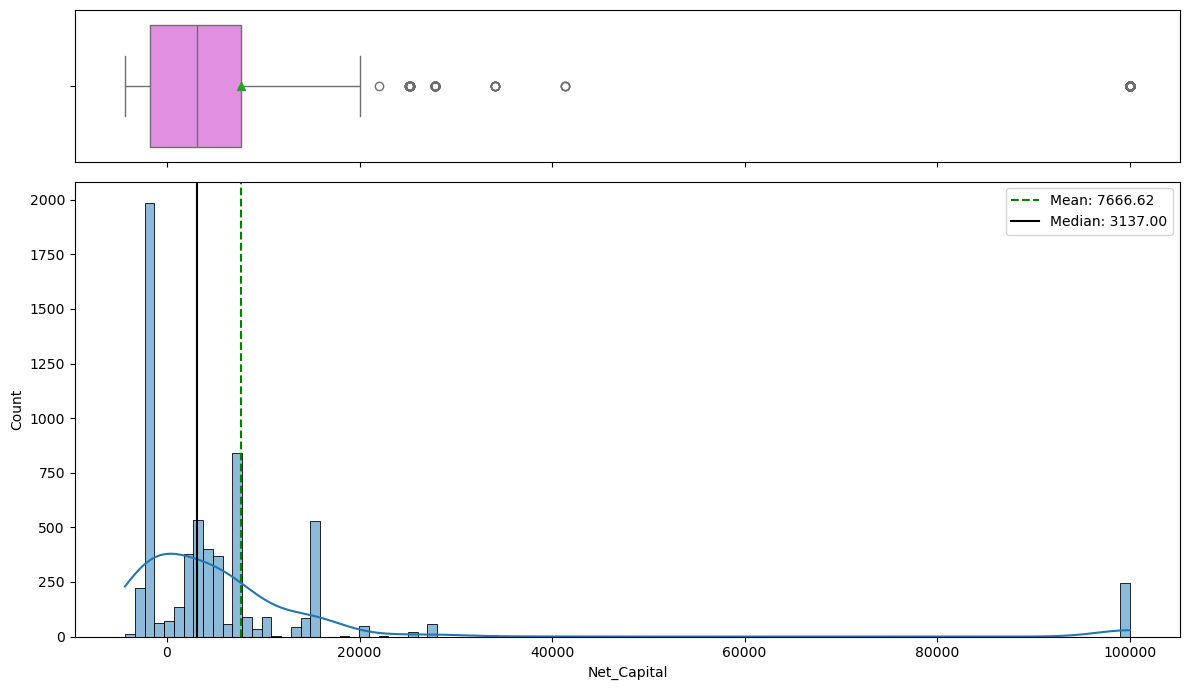

count     6317.000000
mean      7666.619123
std      19518.223024
min      -4356.000000
25%      -1740.000000
50%       3137.000000
75%       7688.000000
max      99999.000000
Name: Net_Capital, dtype: float64

The total percentage of individual with the negative net_capital is 36.12%


In [336]:
# let's take a look at the distribution of the column 'Net_Capital'
histogram_boxplot(df=df_capital_activity, feature='Net_Capital', kde=True)

# get the descriptive stats of the column Age
print(f'{df_capital_activity['Net_Capital'].describe()}\n')

# calculate the percentage of individuals having negative net_capital i.e., losses
negative_net_capital_count = len(df_capital_activity[df_capital_activity["Net_Capital"] <= 0])

negative_percent = round((negative_net_capital_count / df_capital_activity.shape[0]) * 100, 2)
print(f"The total percentage of individual with the negative net_capital is {negative_percent}%")

**Observations [Net Capital]**

- The net_capital ranges from -4356 to 100000.
- Mean is getting influenced due to the outliers on the extreme right.
- Over 36.12% of the total individuals with some capital activity has zero or negative net_capital.

### Average net capital per age_category

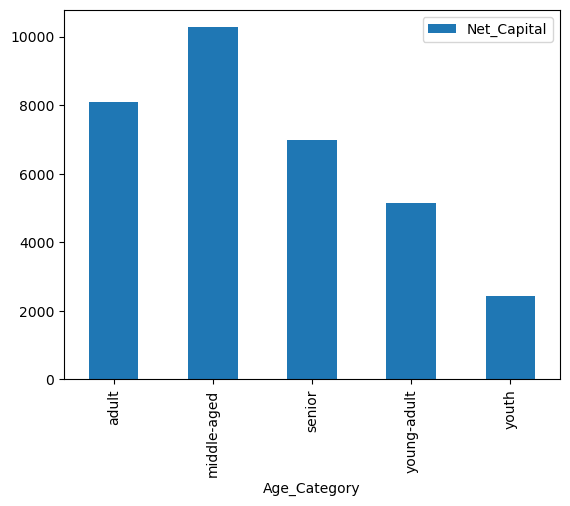

Age_Category
adult           8096.189031
middle-aged    10274.124125
senior          6989.456576
young-adult     5156.406609
youth           2422.101796
Name: Net_Capital, dtype: float64


In [337]:
# plot the average net_capital per age_category!!
df_capital_activity.groupby(by='Age_Category')["Net_Capital"].mean().reset_index().plot(x='Age_Category', y='Net_Capital', kind='bar', legend=True)
plt.show()

# print the mean per Age_Category group
print(df_capital_activity.groupby(by='Age_Category')["Net_Capital"].mean())

**Observations**

- The age category youth has disappeared completely, this indicates that the individuals younger than 25 have no capital activity.
- Then we can see a gradual increase in the mean net capital till the category middle-aged.
    - This suggests that individuals usually start capital activity from the age 25.
    - Also, this increases till they are middle-aged (< 65) and then the net capital starts to decrease again.

### Average net capital per work_intensity group

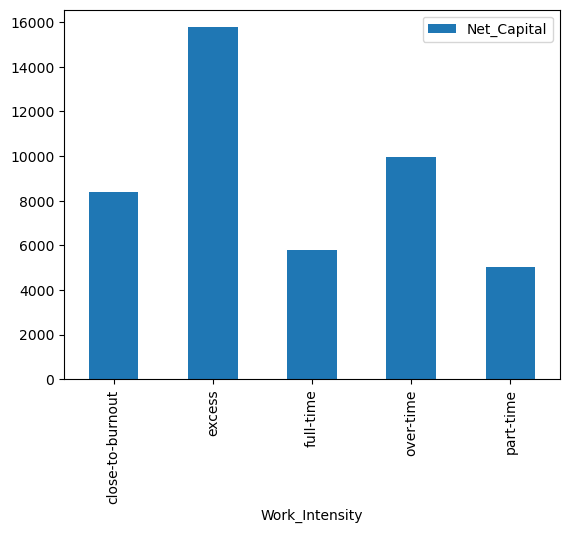

Work_Intensity
close-to-burnout     8375.702128
excess              15770.680608
full-time            5802.800214
over-time            9975.197595
part-time            5024.174658
Name: Net_Capital, dtype: float64


In [338]:
# plot the average net_capital per age_category!!
df_capital_activity.groupby(by='Work_Intensity')["Net_Capital"].mean().reset_index().plot(x='Work_Intensity', y='Net_Capital', kind='bar', legend=True)
plt.show()

# print the mean per work_intensity group
print(df_capital_activity.groupby(by='Work_Intensity')["Net_Capital"].mean())

**Observations**

- The work intensity seems to have a direct impact on the net_capital till the time an individual works below 80 hours a week.
- After working from more than 80 hours, the net capital decreases.
- People working between 60-80 hours a week have the highest net capital

**Impact of grouping**


- Advantages:
    - Grouping data simplified the complex information and reduced noise.
    - It also reduced the number of data points, making it easy to perform summary calculations.
    - With grouping it is also very easy to identify how different groups behave relative to one another (age_category vs. work intensity).

- Disadvantages:
    - Grouping averages individual difference, for eg individual age in age_category.
    - A group's average might not represent any single individual within the group. Few outliers/strong performers might have huge impact on group average.
    - It's easy to get false impression of data. The way we group the data might heavily influence the story it tells.

# Final Dataset Refinement and Structure [5 Marks]

In [339]:
# define columns to drop since these columns were not needed for the assignment in the first place
cols_to_drop = [
    "Workclass", 
    "fnlwgt", 
    "Education", 
    "Education_Num", 
    "Martial_Status", 
    "Occupation", 
    "Relationship", 
    "Race",
    "Sex",
    "Country",
    "Target"
    ]

In [340]:
# drop the columns defined above from the dataframe
df_final = df_capital_activity.drop(columns=cols_to_drop)

In [345]:
df_final.head()

,Age,Capital_Gain,Capital_Loss,Hours_per_week,Education_Category,Work_Intensity,Age_Category,Net_Capital
0,39,2174.0,0.0,40.0,bachelors,full-time,adult,2174.0
8,31,14084.0,0.0,50.0,advanced_degree,over-time,young-adult,14084.0
9,42,5178.0,0.0,40.0,bachelors,full-time,adult,5178.0
23,43,0.0,2042.0,40.0,high_school_incomplete,full-time,adult,-2042.0
32,45,0.0,1408.0,40.0,bachelors,full-time,adult,-1408.0


In [344]:
df_final.isna().sum()

Age                   0
Capital_Gain          0
Capital_Loss          0
Hours_per_week        0
Education_Category    0
Work_Intensity        0
Age_Category          0
Net_Capital           0
dtype: int64

## Summary

**Removed features**
- Workclass
- fnlwgt
- Education
- Education_Num
- Martial_Status
- Occupation
- Relationship
- Race
- Sex
- Country
- Target

- The above features were removed since they had very little to no need to do the current assignment.

**Categorised features**
- Education_Category
- Work_Intensity
- Age_Category

**Newly created features**
- Net_Capital

**Comparision in addition to everything mentioned in above cells!**
- The above mentioned categorised or newly created features have improved the readability and interpretation of the data.
- The data is not easy to interpret and lacks noise as before.
- Also, there are no missing values in the final dataset after the all the refinement.
